In [1]:
import os

import numpy as np
import h5py as h5

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import ion_plot_definitions as ipd

import plotting_tools as pt 

import seaborn as sns
sns.set_style("ticks",{'axes.grid': True, "ytick.major.size": 0.1,
                "ytick.minor.size": 0.05,
                'grid.linestyle': '--'
            })

148 44


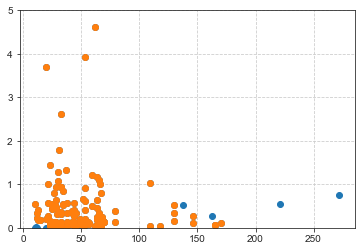

In [24]:
fn = '../../data/analyzed_spectra/combined_spectra.h5'

ray_id, model, ion, col, colerr, impact, total_col, ovi_label, flag = pt.load_data(['ray_id', 'model', 'ion', 'col', 'col_err', 'impact', 'total_col',\
                                'label','flag'], fn = fn)
mask = (ion == 'OVI') & (model == 'P0')
mask2 = mask & (flag == 1)
mask3 = mask & (colerr > 0.5)
plt.scatter(impact[mask], colerr[mask])
plt.scatter(impact[mask2], colerr[mask2])
#plt.scatter(impact[mask], total_col[mask])

#plt.ylim(12, 16)
#plt.xlim(0, 80)

plt.ylim(0, 5)
print(len(col[mask]), len(col[mask3]))




In [19]:
plt.histogram(colerr[mask])


(array([147,   0,   0,   0,   0,   0,   0,   0,   0,   1]),
 array([0.0, 16.5417, 33.0834, 49.625099999999996, 66.1668,
        82.70849999999999, 99.25019999999999, 115.7919, 132.3336,
        148.87529999999998, 165.417], dtype=object))

In [14]:
temp_mask = (model == 'P0_agncr') & (ray_id == 150)
ion[temp_mask], col[temp_mask], flag[temp_mask]

(array(['HI', 'OVI', 'CII', 'CIII', 'SiII', 'SiIII', 'SiIV', 'NV'],
       dtype=object),
 array([14.347, 13.259138833802332, 12.968013062672162, 12.284832636628234,
        12.37154548193079, 12.110943324903028, 12.42288439782622,
        11.424367228957017], dtype=object),
 array([1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0], dtype=object))

In [10]:
for i in range(len(col[mask])):
    print("%3d %.1f %7s %i"%(ray_id[mask][i], col[mask][i], ovi_label[mask][i], flag[mask][i]))

150 13.3      -- 3
161 11.8      -- 3
195 13.1      -- 3
103 12.2      -- 3
194 12.9      -- 3
167 12.8      -- 3
193 12.6   nolow 1
193 13.6  narrow 1
102 13.2   nolow 1
105 13.7  narrow 1
 50 13.4  narrow 1
 57 12.3      -- 3
 68 12.9      -- 3
 35 13.2      -- 3
 93 13.4      -- 3
 58 12.0      -- 3
 94 12.7      -- 3
 69 13.7   broad 1
 51 13.4   nolow 1
 34 12.9      -- 3
 29 12.4      -- 3
 87 13.8  narrow 1
 73 12.5      -- 3
 21 13.0      -- 3
 17 13.3      -- 3
 88 14.1  narrow 1
 75 13.4      -- 3
173 13.1      -- 3
  1 13.0      -- 3
110 14.5  narrow 1
188 13.4   nolow 1
186 13.6  narrow 1
100 13.3      -- 3
107 13.9  narrow 1
153 13.7      -- 1
154 13.7      -- 1
162 12.3      -- 3
165 13.3      -- 1
106 13.0      -- 3
108 12.7      -- 3
197 14.0  narrow 1
197 13.3  narrow 1
152 12.8      -- 3
199 13.2      -- 3
 36 13.7  narrow 1
 36 14.0  narrow 1
 31 12.0      -- 3
 54 12.9      -- 3
 91 13.9   broad 1
 62 12.6      -- 3
 30 13.1      -- 3
 37 13.5  narrow 1
 63 13.2    

/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/anaconda3/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecatio

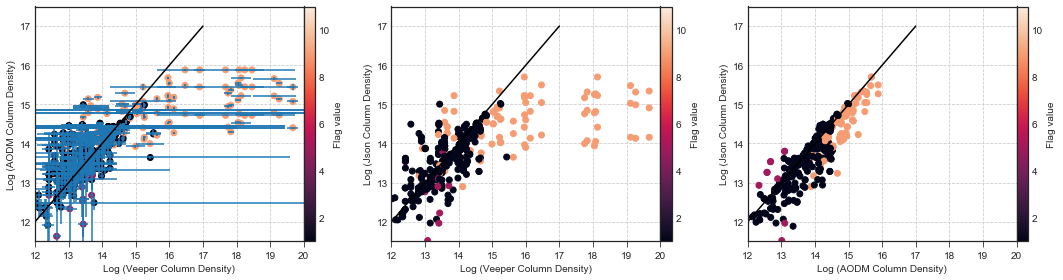

In [2]:
restwave, col, col_aodm, col_json, flag = pt.load_data(['restwave', 'col_veeper', 'col_aodm', 'col_json', 'flag'], use_filtered = False)
ion, model, impact = pt.load_data(['ion','model',  'impact'], use_filtered = False)
col_err, col_aodm_err, col_json_err, eqw_aodm, eqw_aodm_err, eqw_json, eqw_json_err = \
    pt.load_data(['col_err_veeper', 'col_err_aodm', 'col_err_json', 'eqw_aodm', 'eqw_err_aodm', 'eqw_json', 'eqw_err_json'], use_filtered = False)

#mask = (flag == 1) & (model == 'P0') & (ion == 'NIII') 
mask = (impact > 0)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#print(col_err[mask], restwave[mask])

fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
ax[0].errorbar(col[mask], col_aodm[mask], xerr = col_err[mask], yerr = col_aodm_err[mask], linestyle = '')
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(12, 20)
ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Log (Veeper Column Density)')
ax[0].set_ylabel('Log (AODM Column Density)')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()
#plt.savefig('../../plots/compare_column_flags.png', dpi = 300)

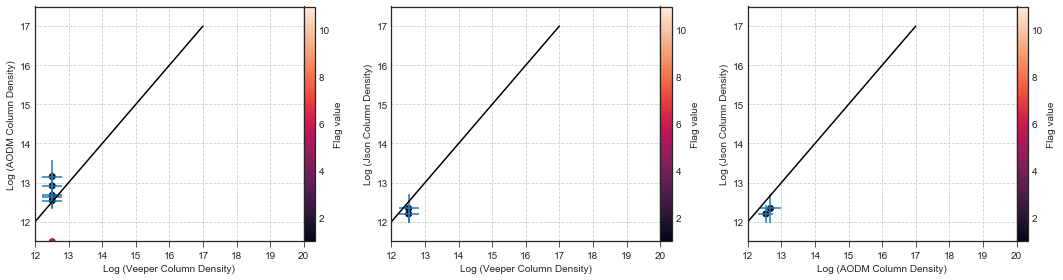

In [26]:
col, col_aodm, col_json, flag = pt.load_data(['col_veeper', 'col_aodm', 'col_json', 'flag'], use_filtered = False)
ion, model, impact = pt.load_data(['ion','model', 'impact'], use_filtered = False)
col_err, col_aodm_err, col_json_err, eqw_aodm, eqw_aodm_err, eqw_json, eqw_json_err = \
    pt.load_data(['col_err_veeper', 'col_err_aodm', 'col_err_json', 'eqw_aodm', 'eqw_err_aodm', \
                  'eqw_json', 'eqw_err_json'], use_filtered = False)
mask = (flag > 0) & (model == 'P0')

mask = (ion == 'SiII')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)


fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
ax[0].errorbar(col[mask], col_aodm[mask], xerr = col_err[mask], yerr = col_aodm_err[mask], linestyle = '')
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(12, 20)
ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Log (Veeper Column Density)')
ax[0].set_ylabel('Log (AODM Column Density)')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()

(1000, 1800)

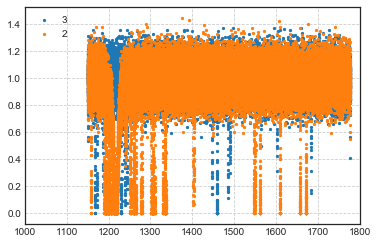

In [93]:
plt.scatter(wl3, flux3, label = '3', s = 5)
plt.scatter(wl2, flux2, label = '2', s = 5)
#plt.scatter(wl, flux, label = '0', s = 5)
plt.legend()
plt.xlim(1000, 1800)
#plt.xlim(1400, 1500)

['HI' 'HI' 'HI' ... 'NV' 'NV' 'NV']


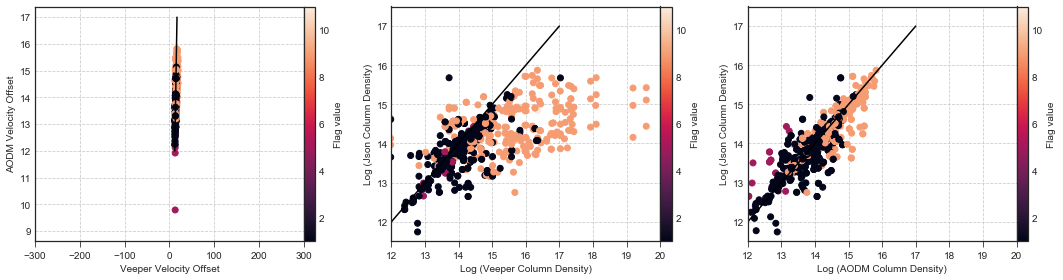

In [9]:
vel, vel_aodm = pt.load_data(['vel', 'vel_aodm'], use_filtered = False)

mask = (flag == 1) & (model == 'anisd') & (impact  == 30) & (ion == 'NIII') 
mask = (impact > 0)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
print(ion[mask])

fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(-300, 300)
#ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Veeper Velocity Offset')
ax[0].set_ylabel('AODM Velocity Offset')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()
#plt.savefig('../../plots/compare_column_flags.png', dpi = 300)

In [6]:
fn = '../../data/analyzed_spectra/filtered_spectra.h5'
data = h5.File(fn, 'r')


In [9]:
impact = data['impact'].value
vel = data['vel'].value

In [10]:
print(len(impact), len(vel))

537 683


In [11]:
mask = data['impact'].value > -99


In [13]:
vel[:537][mask]

array([ 2.60600e+00,  5.85900e+00,  2.53200e+00, -3.73000e-01,
       -4.43700e+00, -4.93900e+00, -2.13800e+00,  6.16300e+00,
        1.73300e+00,  1.73300e+00,  1.24690e+01,  5.01700e+00,
        5.01700e+00,  1.47030e+01,  1.20740e+01, -9.99900e+03,
        1.45960e+01,  1.62410e+01,  1.43820e+01,  1.26520e+01,
        1.26520e+01,  2.83200e+00, -7.74500e+00, -7.74500e+00,
       -1.22200e+00, -9.99900e+03,  6.68500e+00,  8.63500e+00,
        2.57100e+00, -2.31700e+00, -2.31700e+00, -2.40100e+00,
       -7.98700e+00, -7.98700e+00, -9.99900e+03, -4.32100e+00,
       -9.99900e+03, -3.67500e+00, -3.67500e+00, -2.86900e+00,
       -5.73800e+00, -5.73800e+00, -9.99900e+03, -8.65900e+00,
       -9.99900e+03, -9.99900e+03, -9.99900e+03, -7.86900e+00,
       -7.86900e+00, -1.07700e+00, -1.51600e+00, -1.51600e+00,
       -9.99900e+03, -9.99900e+03, -9.99900e+03, -9.99900e+03,
       -9.99900e+03, -9.99900e+03, -9.99900e+03, -9.99900e+03,
       -9.99900e+03, -9.99900e+03, -9.99900e+03, -9.999

In [8]:
import glob
import os
spec_files = glob.glob('../../data/analyzed_spectra/COS-FUV*')
spec = spec_files[0]


In [11]:
os.path.dirname(spec)

'../../data/analyzed_spectra'

In [12]:

ls


NameError: name 'ls' is not defined